# 異常値検知

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [13]:
df = pd.read_csv("./Dataset/chfdb_chf01_275.txt", sep='\t',names=('time','value1','value2'))

In [16]:
df

,time,value1,value2
0,275.000,-0.645,0.665
1,275.004,-0.635,0.710
2,275.008,-0.645,0.745
3,275.012,-0.635,0.760
4,275.016,-0.645,0.785
...,...,...,...
3746,289.984,-0.440,-0.070
3747,289.988,-0.445,-0.045
3748,289.992,-0.435,-0.070
3749,289.996,-0.445,-0.060


## 生データの可視化

### value1の時系列データ可視化

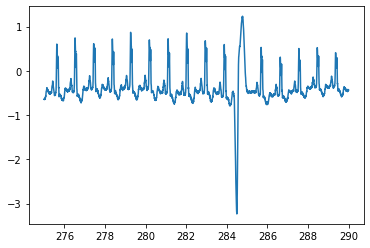

In [21]:
plt.plot(df["time"],df["value1"])

### value2の時系列データ可視化

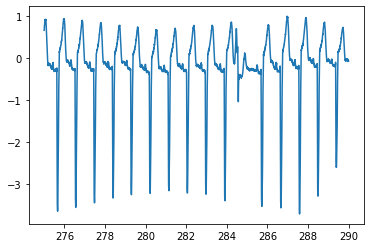

In [23]:
plt.plot(df["time"],df["value2"])

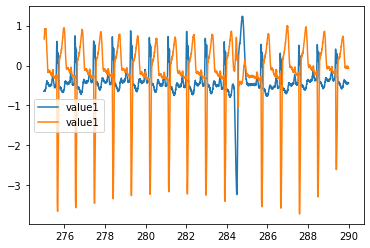

In [19]:
plt.plot(df["time"],df["value1"],label="value1")
plt.plot(df["time"],df["value2"],label="value1")
plt.legend()

## データを標準化

In [27]:
ss = StandardScaler()

In [29]:
val1 = np.array(df["value1"])
val2 = np.array(df["value2"])

In [35]:
val1 = val1.reshape(1,-1)
val2 = val2.reshape(1,-1)

In [40]:
ss_val1 = ss.fit_transform(val1)
ss_val2 = ss.fit_transform(val2)

### グラフで可視化(標準化データ)

In [53]:
ss_val1.shape

(1, 3751)

In [65]:
ss_val1[0].shape

(3751,)

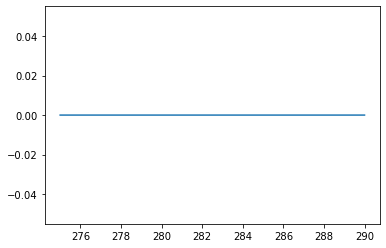

In [68]:
plt.plot(df["time"],ss_val1[0])

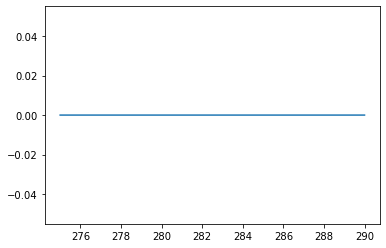

In [69]:
plt.plot(df["time"],ss_val2[0])